In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=7dc0ae4b9e6a261853cb8fd10fa0f4f8b99f5126937f8f24fa8eb3c59ab4335e
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
data = requests.get("https://www.theglobaleconomy.com/rankings/happiness/").text

In [4]:
soup =  BeautifulSoup(data , "html.parser")

In [5]:
#print page title

soup.title.text

'Happiness index by country, around the world | TheGlobalEconomy.com'

In [6]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [8]:

happines_data =  soup.find_all('table')  #by tag name

happines_data =  soup.find_all(id='benchmarkTable')  #  by table element id
   
#get table head    
df=pd.read_html(str(happines_data), flavor='bs4')[0]
    
  

Index(['Countries', 'Happiness index, 2022', 'Global rank', 'Available data'], dtype='object')

In [10]:
#set Country As Index
df.set_index('Countries' , inplace=True)

In [11]:
#change Column Happines Index  to Happines_index
df.rename(columns ={"Happiness index, 2022":"Happines_index"} ,inplace=True)

In [12]:
df

,Happines_index,Global rank,Available data
Countries,,,
Finland,7.80,1,2013 - 2022
Denmark,7.59,2,2013 - 2022
Iceland,7.53,3,2013 - 2022
Israel,7.47,4,2013 - 2022
Netherlands,7.40,5,2013 - 2022
...,...,...,...
DR Congo,3.21,130,2017 - 2022
Zimbabwe,3.20,131,2013 - 2022
Sierra Leone,3.14,132,2013 - 2022


In [14]:
#get happines index for Finland

df.loc["Finland" ,"Happines_index"]

7.8

In [15]:
#get statistics

df.describe()

,Happines_index,Global rank
count,134.000000,134.000000
mean,5.536716,67.500000
std,1.140036,38.826537
min,1.860000,1.000000
25%,4.755000,34.250000
50%,5.670000,67.500000
75%,6.322500,100.750000
max,7.800000,134.000000


In [29]:
#check if Sudan Exists
df.isnull().sum()

Happines_index    0
Global rank       0
Available data    0
dtype: int64

In [38]:
df.loc['Finland']

Happines_index            7.8
Global rank                 1
Available data    2013 - 2022
Name: Finland, dtype: object

In [43]:
df.loc['Finland' ,'Happines_index'].s

7.8

In [44]:
%matplotlib inline 
%matplotlib notebook


import matplotlib as mpl
import matplotlib.pyplot as plt

In [70]:
df.sort_values(by='Happines_index', ascending=False, axis=0, inplace=True)

top_5 = df.head(5)
top5_happines=top_5['Happines_index']

In [62]:
#we must  transpose the dataframe using transpose() method to swap the row and columns.

top5_happines.transpose()

Countries,Finland,Denmark,Iceland,Israel,Netherlands
Happines_index,7.8,7.59,7.53,7.47,7.4
Global rank,1,2,3,4,5
Available data,2013 - 2022,2013 - 2022,2013 - 2022,2013 - 2022,2013 - 2022


<AxesSubplot:xlabel='Countries'>

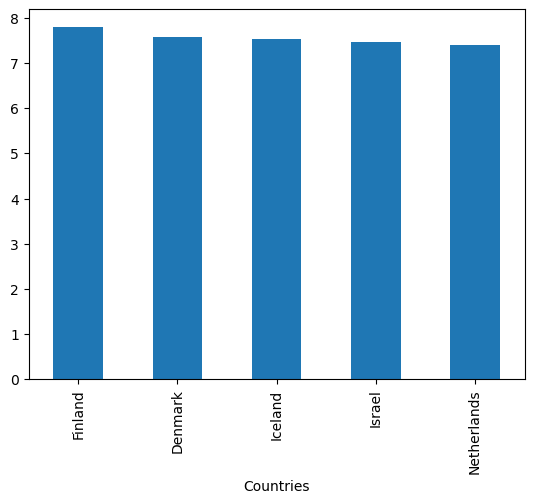

In [71]:
%matplotlib inline 


import matplotlib as mpl
import matplotlib.pyplot as plt


#visualize data by sing bar plot
top5_happines.plot(kind='bar')
# plt.title('Immigrants from China and India')
# plt.ylabel('Number of Immigrants')
# plt.xlabel('Years')

# plt.show()